# Итоговый проект "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"

In [820]:
#!pip install lightgbm

In [821]:
import datetime # для работы со времнем
import gc # сборщик мусора

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

#from lightgbm import LGBMRegressor

%matplotlib inline

# 1. Чтение данных

In [822]:
df = pd.read_csv("./train.csv", encoding='utf-8')

In [823]:
X = df.drop('Price', axis=1)
y = df[['Price']]

X_final = pd.read_csv('test.csv')

# сразу создам
preds_final = pd.DataFrame()
preds_final['Id'] = X_final['Id'].copy()

X.set_index('Id', inplace=True)
X_final.set_index('Id', inplace=True)

print('Строк в трейне:' ,  X.shape[0])
print('Строк в тесте', X_final.shape[0])

# Удалим ненужные файлы
del df
gc.collect()  

Строк в трейне: 10000
Строк в тесте 5000


11616

In [824]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B


In [825]:
X['DistrictId'] = X['DistrictId'].astype(str)
X_final['DistrictId'] = X_final['DistrictId'].astype(str)

In [826]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

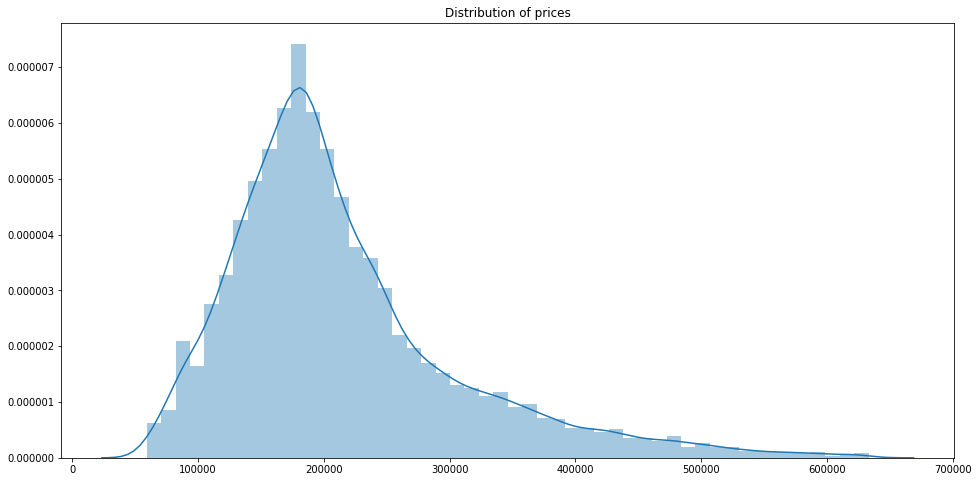

In [827]:
# Распределение целевой переменной

plt.figure(figsize = (16, 8))

sns.distplot(y, bins=50)

n = np.linspace(0, 0.000005, 100)

plt.title('Distribution of prices')
plt.show()

## 1. Минимальный EDA

Делайем EDA не просто так, а для:
- Исправления выбросов
- Заполнения NaN
- Идей для генерации новых фич

### 1.1 Выбросы

In [828]:
X.dtypes

DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

**Rooms**

In [829]:
X['Rooms'].value_counts()

# > 6 комнат, = 0 комнат

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

**Floor, HouseFloor**

In [831]:
X['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [832]:
X['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [833]:
(X['Floor'] > X['HouseFloor']).sum()

1825

**HouseYear**

In [834]:
X['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [835]:
X[X['HouseYear'] > 2020].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B
11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B


### Заполнение NaN

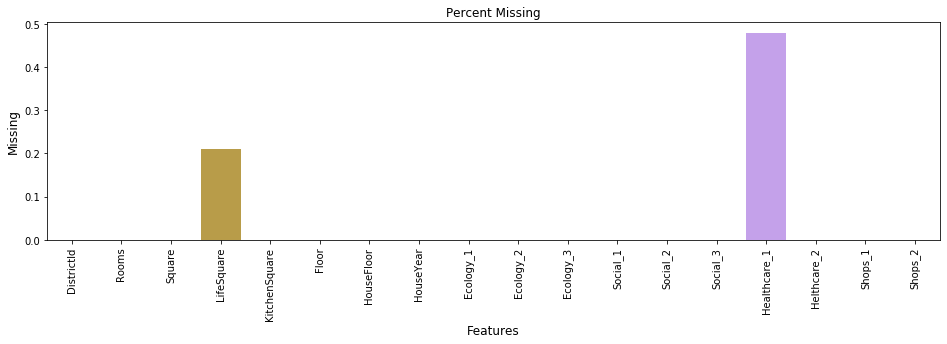

In [836]:
import seaborn as sns

nan_df = (X.isna().sum() / X.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Удалим Healthcare_1
# Заполним LifeSquare

### 1.2 Feature engineering

**DistrictId**

In [837]:
X.DistrictId.nunique()

205

In [838]:
#dict(X['DistrictId'].value_counts())

# 2. Очистка данных

In [839]:
class FeatureImputer:
    """Заполнение пропусков и обработка выбросов"""
    
    def __init__(self):
        self.medians=None
        
    def fit(self, X):
        self.medians = X.median()
    
    def transform(self, X):
        
        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        #X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms'] # !!! медиана посчитана на трейне !!!        
        m_per_room = X.loc[(X['Rooms'] < 6) & (X['Rooms'] > 0), 'Square'].sum() / X.loc[(X['Rooms'] < 6) & (X['Rooms'] > 0), 'Rooms'].sum()
        X.loc[X['Rooms'] >= 6, 'Rooms'] = X.loc[X['Rooms'] >= 6, "Square"] / m_per_room

        # KitchenSquare
        X['Kitchen_outlier'] = 0
        X.loc[(X['KitchenSquare'] < 3) | (X['KitchenSquare'] > 1000), 'Kitchen_outlier'] = 1        
        
        #X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        #X.loc[X['KitchenSquare'] > 1000, 'KitchenSquare'] = X.loc[X['KitchenSquare'] > 1000, 'KitchenSquare'] / 10  # можно median
        
        kitchen_mean = X.loc[(X['KitchenSquare'] >= 3) & (X['KitchenSquare'] <= 1000), 'KitchenSquare'].mean() / X.loc[(X['KitchenSquare'] >= 3) & (X['KitchenSquare'] <= 1000), 'Square'].mean()
        X.loc[(X['KitchenSquare'] < 3) | (X['KitchenSquare'] > 1000), 'KitchenSquare'] = X.loc[(X['KitchenSquare'] < 3) | (X['KitchenSquare'] > 1000), 'Square'] * kitchen_mean
        
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = X['HouseFloor'].mode("HouseYear")              
        #X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor'] = X.loc[X['Floor'] > X['HouseFloor'], 'Floor']
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor'] = X.loc[X['HouseFloor'] == 0, 'Floor']
        
        
        
        # HouseYear
        current_year = now = datetime.datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = X['HouseYear'].mode()
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        lifesquare_mean = X.loc[X['LifeSquare'].notnull(), "LifeSquare"].mean() / X.loc[X['LifeSquare'].notnull(), "Square"].mean()
        X.loc[X['LifeSquare'].isna(), "LifeSquare"] = X.loc[X['LifeSquare'].isna(), "Square"] * lifesquare_mean
        
                
       # condition = (X['LifeSquare'].isna()) &\
                      #(~X['Square'].isna()) & \
                      #(~X['KitchenSquare'].isna())
        
        #X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        return X
        

In [840]:
imputer = FeatureImputer()

imputer.fit(X) # расчет медиан

X = imputer.transform(X)
X_final = imputer.transform(X_final)

# 3. Feature engineering

In [841]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # DistrictID
        district = X['DistrictId'].value_counts()
        district = district[district >= 65]  ## Если вы этого не сделаете, то на Leaderboard-е улетите в самый низ (>100 места, R2 ~ 0.65),
                                            ## Хотя на локальной валидации скор вырастет
        
        self.DistrictId_counts = dict(district)
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # Target encoding
        ## District
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            df = self.square_to_cat(df)
            df['DistrictId_popular'] = df['DistrictId'].copy()
            df.loc[~df['DistrictId_popular'].isin(district.keys().tolist())] = np.nan
            df = self.square_to_cat(df)
            self.med_price_by_district = df.groupby(['DistrictId_popular', 'square_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByDistrict',
                                                           'DistrictId_popular': 'DistrictId'})
            
        ## floor, year
        if y is not None:
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
        

        
    def transform(self, X):
        
        # DistrictId
        X['DistrictId_count'] = X['DistrictId'].map(self.DistrictId_counts)  # self.DistrictId_counts = {'id': value}
        
        X['new_district'] = 0
        X.loc[X['DistrictId_count'].isna(), 'new_district'] = 1
        
        district = X['DistrictId'].value_counts()
        disr_mean = district[district < 15].mean()
        X['DistrictId_count'].fillna(disr_mean, inplace=True)
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        X = self.square_to_cat(X)   # + столбец square_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'square_cat'], how='left')
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
        
        return X
    
    @staticmethod
    def floor_to_cat(X):
        
        X['floor_cat'] = np.nan
        
        X.loc[X['Floor'] < 3, 'floor_cat'] = 1  
        X.loc[(X['Floor'] >= 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
        X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
        X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
        X.loc[X['Floor'] > 15, 'floor_cat'] = 5
            
        return X
     
    @staticmethod
    def year_to_cat(X):
        
        X['year_cat'] = np.nan
        
        X.loc[X['HouseYear'] < 1941, 'year_cat'] = 1
        X.loc[(X['HouseYear'] >= 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
        X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
        X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
        X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
        X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6
        
        return X


    @staticmethod
    def square_to_cat(X):
        
        X['square_cat'] = np.nan
        
        X.loc[X['Square'] < 30, 'square_cat'] = 1
        X.loc[(X['Square'] >= 30) & (X['Square'] <= 35), 'square_cat'] = 2
        X.loc[(X['Square'] > 35) & (X['Square'] <= 40), 'square_cat'] = 3 
        X.loc[(X['Square'] > 40) & (X['Square'] <= 45), 'square_cat'] = 4
        X.loc[(X['Square'] > 45) & (X['Square'] <= 50), 'square_cat'] = 5
        X.loc[(X['Square'] > 50) & (X['Square'] <= 55), 'square_cat'] = 6
        X.loc[(X['Square'] > 55) & (X['Square'] <= 60), 'square_cat'] = 7        
        X.loc[(X['Square'] > 60) & (X['Square'] <= 65), 'square_cat'] = 8
        X.loc[(X['Square'] > 65) & (X['Square'] <= 70), 'square_cat'] = 9
        X.loc[(X['Square'] > 70) & (X['Square'] <= 75), 'square_cat'] = 10
        X.loc[(X['Square'] > 75) & (X['Square'] <= 80), 'square_cat'] = 11 
        X.loc[(X['Square'] > 80) & (X['Square'] <= 85), 'square_cat'] = 12       
        X.loc[(X['Square'] > 85) & (X['Square'] <= 90), 'square_cat'] = 13 
        X.loc[(X['Square'] > 90) & (X['Square'] <= 100), 'square_cat'] = 14 
        X.loc[(X['Square'] > 100) & (X['Square'] <= 130), 'square_cat'] = 15         
        X.loc[(X['Square'] > 130), 'square_cat'] = 16
        
        return X
            
    

In [842]:
features = FeatureGenetator()

features.fit(X, y)

X = features.transform(X)
X_final = features.transform(X_final)


In [843]:
X.head(2)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictId_count,new_district,floor_cat,year_cat,square_cat,MedPriceByDistrict,MedPriceByFloorYear
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.08904,1,...,0,0,0,6.945055,1,3.0,3.0,5.0,NaN,176861.20259
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.00007,1,...,0,0,0,87.000000,0,3.0,3.0,9.0,308933.765387,176861.20259


In [844]:
X.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Rooms_outlier', 'Kitchen_outlier', 'HouseFloor_outlier',
       'HouseYear_outlier', 'LifeSquare_nan', 'DistrictId_count',
       'new_district', 'floor_cat', 'year_cat', 'square_cat',
       'MedPriceByDistrict', 'MedPriceByFloorYear'],
      dtype='object')

In [845]:
X['HouseFloor'].fillna(X['HouseFloor'].median(), inplace=True)
X['HouseYear'].fillna(X['HouseYear'].median(), inplace=True)
X['year_cat'].fillna(X['year_cat'].median(), inplace=True)
X['MedPriceByDistrict'].fillna(X['MedPriceByDistrict'].median(), inplace=True)
X['MedPriceByFloorYear'].fillna(X['MedPriceByFloorYear'].median(), inplace=True)
X['square_cat'].fillna(X['square_cat'].median(), inplace=True)

In [846]:
remain_features = ['Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'Ecology_1', 'Social_1', 
                   'HouseYear', 'Social_2', 'Social_3', 'Rooms',  'floor_cat',
                  'DistrictId_count',  'MedPriceByFloorYear', 'MedPriceByDistrict', 'square_cat']

# 'Ecology_2', 'Ecology_3', 'Shops_2', 'Shops_1', 'Helthcare_2',' HouseFloor', 'new_district',  , 'MedPriceByDistrict','new_district',
# 'Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'Kitchen_outlier','year_cat',
# 

X = X[remain_features]
X_final = X_final[remain_features]

# 4. Модель

In [817]:
# Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# !conda install -c conda-forge lightgbm
#from lightgbm import LGBMRegressor


# Метирки качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

### Random Forest

In [861]:
rf_model = RandomForestRegressor(criterion='mse',                                 
                                 random_state=42)                        

In [862]:
# Подбор наилучших параметров с использованием GridSearch

params = {'n_estimators':[50, 100, 200, 400], 
          'max_depth':[5, 7, 10, 12, 15], 'min_samples_leaf':[20, 30, 40, 50]}

gs = GridSearchCV(rf_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=42, 
                           shuffle=True), 
                  n_jobs=-1  # Кол-во потоков 
                 )
gs.fit(X, y)

C:\Users\mreun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [863]:
# Посмотрим, какие параметры дают наилучший результат, и будем их использовать в модели дальше
gs.best_params_

{'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 400}

In [864]:
# Уточним выбор параметров с использованием близких, к предыдущему упражнению параметров
params = {'n_estimators':[300,350, 375,400,420,440], 
          'max_depth':[13, 14, 15, 16, 17], 'min_samples_leaf':[18, 20, 22]}

gs = GridSearchCV(rf_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=42, 
                           shuffle=True), 
                  n_jobs=-1  # Кол-во потоков 
                 )
gs.fit(X, y)

C:\Users\mreun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [865]:
gs.best_params_

{'max_depth': 17, 'min_samples_leaf': 18, 'n_estimators': 350}

In [866]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=17, # глубина дерева  
                                 min_samples_leaf=18, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,                                
                                n_estimators=350  # кол-во деревьев
                                )

In [867]:
# Делаем кросс-валидацию на 10 частях

cv_score = cross_val_score(rf_model, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=10, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

C:\Users\mreun\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mreun\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mreun\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mreun\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

In [868]:
print(f'Средняя точность при кросс-валидации Random Forest - {mean}')

Средняя точность при кросс-валидации Random Forest - 0.734474301107808


In [869]:
# Обучаем модель на всем трейне

rf_model.fit(X, y)

C:\Users\mreun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=18, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=350,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

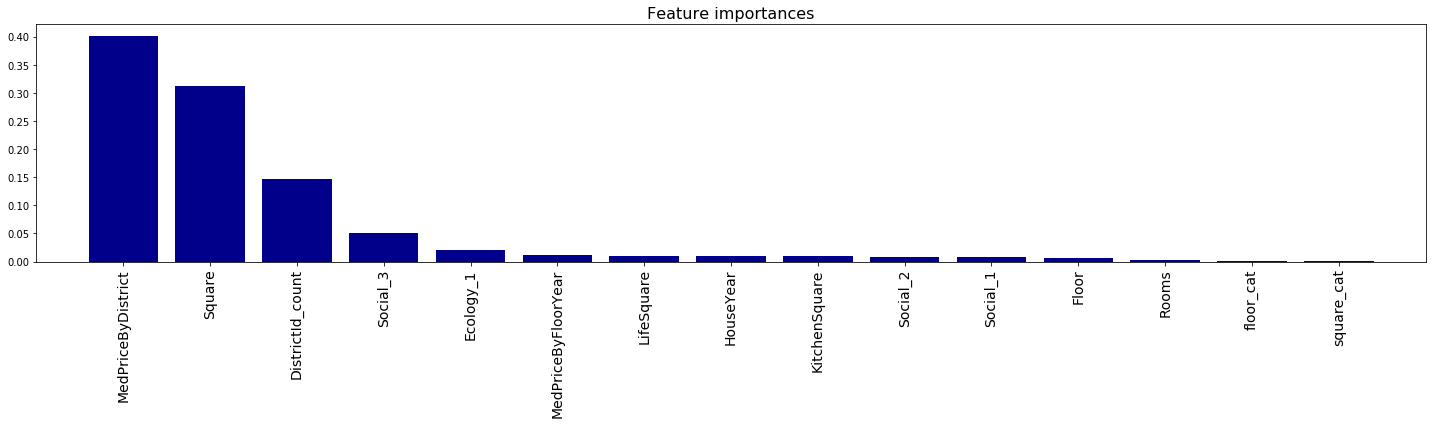

In [870]:
# Нарисуем значимость features

def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    # plt.savefig('fe.jpg')
    plt.show()
    
plot_feature_importances(importances = rf_model.feature_importances_, X=X)

### Decision Tree

In [871]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 random_state=42)

In [874]:
# Подбор наилучших параметров с использованием GridSearch

params = {'max_depth':[12, 13, 14, 15, 16], 'min_samples_leaf':[ 35,38, 40, 42, 45]}

gs = GridSearchCV(dt_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=42, 
                           shuffle=True), 
                  n_jobs=-1  # Кол-во потоков 
                 )
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15, 16],
                         'min_samples_leaf': [35, 38, 40, 42, 45]},
             pre_dispatch='2

In [875]:
gs.best_params_

{'max_depth': 13, 'min_samples_leaf': 40}

In [876]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=13, # глубина дерева  
                                 min_samples_leaf=40, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)

In [877]:
cv_score = cross_val_score(dt_model, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=10, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

In [878]:
print(f'Средняя точность при кросс-валидации Random Forest - {mean}')

Средняя точность при кросс-валидации Random Forest - 0.6993544547261321


In [879]:
dt_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

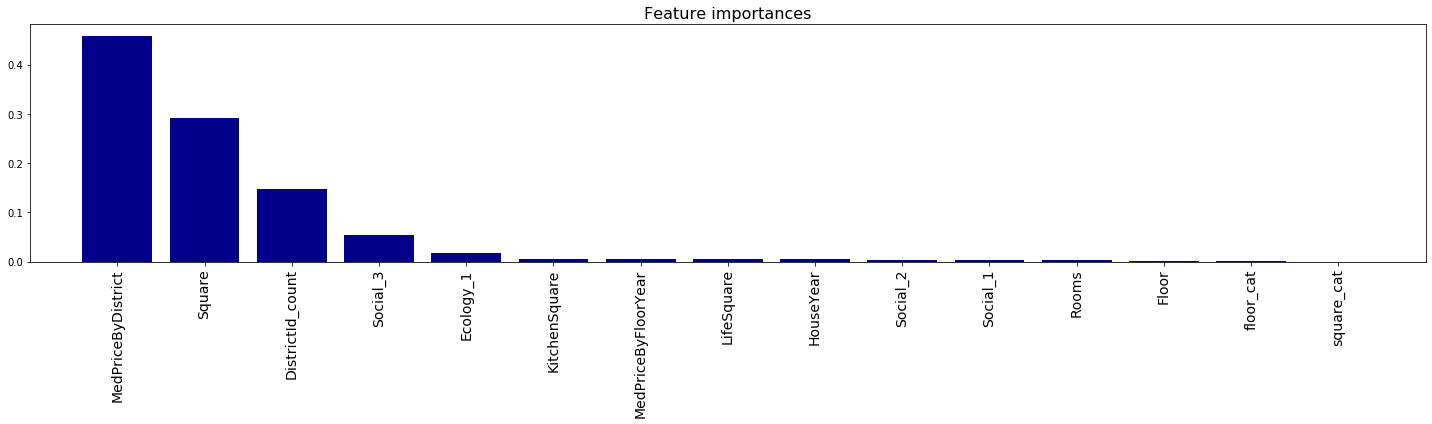

In [880]:
def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    # plt.savefig('fe.jpg')
    plt.show()
    
plot_feature_importances(importances = dt_model.feature_importances_, X=X)

### LinearRegression

In [881]:
lr_model = LinearRegression()

In [882]:
cv_score = cross_val_score(lr_model, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=10, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

In [883]:
mean

0.5668226529492804

### Предсказание на test set

In [884]:
X_final['MedPriceByFloorYear'].fillna(X['MedPriceByFloorYear'].median(), inplace=True)
X_final['MedPriceByDistrict'].fillna(X['MedPriceByDistrict'].median(), inplace=True)

In [887]:
X_final.isna().any()

Square                 False
LifeSquare             False
KitchenSquare          False
Floor                  False
Ecology_1              False
Social_1               False
HouseYear              False
Social_2               False
Social_3               False
Rooms                  False
floor_cat              False
DistrictId_count       False
MedPriceByFloorYear    False
MedPriceByDistrict     False
square_cat             False
dtype: bool

In [885]:
# Для прдсказания используется модель random forest

y_pred_final = rf_model.predict(X_final)

preds_final['Price'] = y_pred_final
preds_final.to_csv('predictions.csv', index=False)

preds_final.head()

,Id,Price
0,725,144872.335914
1,15856,234319.284403
2,5480,225151.905445
3,15664,280437.760310
4,14275,146138.774197


In [886]:
preds_final.shape

(5000, 2)